In [1]:
## Load Data -> Data downloaded from https://data.world/fivethirtyeight/russian-troll-tweets

In [2]:
import pandas as pd
import io
import matplotlib
import requests
import re

In [3]:
df = pd.read_csv('data.csv')

In [4]:
## Drop columns not needed and count number of tweets in russian just for fun 

#df.drop(columns=['external_author_id', 'harvested_date', 'post_type', 'new_june_2018'])

#in_russian = 0
#is_local = []
#for i, row in df.head(1000).iterrows():
#    if row['language'] == 'Russian':
#        in_russian+=1
#    if (not row['account_type'] == 'left') and (not row['account_type'] == 'right'):
#        is_local.append(i)
#df.drop(is_local, axis=0, inplace=True)
#df.drop(columns=['language'], inplace=True)

#print(in_russian)

In [5]:
# Use regex to figure out if the tweet mentions a few relevant political figures 

trump_regex = re.compile(r'(Donald|Trump)')
hill_regex = re.compile(r'(Hillary|Clinton)')
bernie_regex = re.compile(r'(Bernie)')
obama_regex = re.compile(r'(Obama)')
cruz_regex = re.compile(r'(Ted Cruz|Cruz)')
beto_regex = re.compile(r'(Beto|O\'Rourke)')


for i, row in df.iterrows():
    df.at[i, 'mention'] = ''
    search_string = str(row['content'])
    if re.search(trump_regex, search_string):
        df.at[i, 'mention'] = df.at[i, 'mention'] + 'Trump '
    if re.search(hill_regex, search_string):
        df.at[i, 'mention'] = df.at[i, 'mention'] + 'Hillary '
    if re.search(bernie_regex, search_string):
        df.at[i, 'mention'] = df.at[i, 'mention'] + 'Bernie '
    if re.search(obama_regex, search_string):
        df.at[i, 'mention'] = df.at[i, 'mention'] + 'Obama '
    if re.search(cruz_regex, search_string):
        df.at[i, 'mention'] = df.at[i, 'mention'] + 'Cruz '
    if re.search(beto_regex, search_string):
        df.at[i, 'mention'] = df.at[i, 'mention'] + 'Beto '

for i, row in df.iterrows():
    if df.at[i,'mention'] is '':
        df.at[i,'mention'] = 'NaN'
        
set(df['mention'])

{'Bernie ',
 'Bernie Cruz ',
 'Bernie Obama ',
 'Cruz ',
 'Hillary ',
 'Hillary Bernie ',
 'Hillary Bernie Obama ',
 'Hillary Cruz ',
 'Hillary Obama ',
 'Hillary Obama Cruz ',
 'NaN',
 'Obama ',
 'Obama Cruz ',
 'Trump ',
 'Trump Bernie ',
 'Trump Cruz ',
 'Trump Hillary ',
 'Trump Hillary Bernie ',
 'Trump Hillary Cruz ',
 'Trump Hillary Obama ',
 'Trump Obama ',
 'Trump Obama Cruz '}

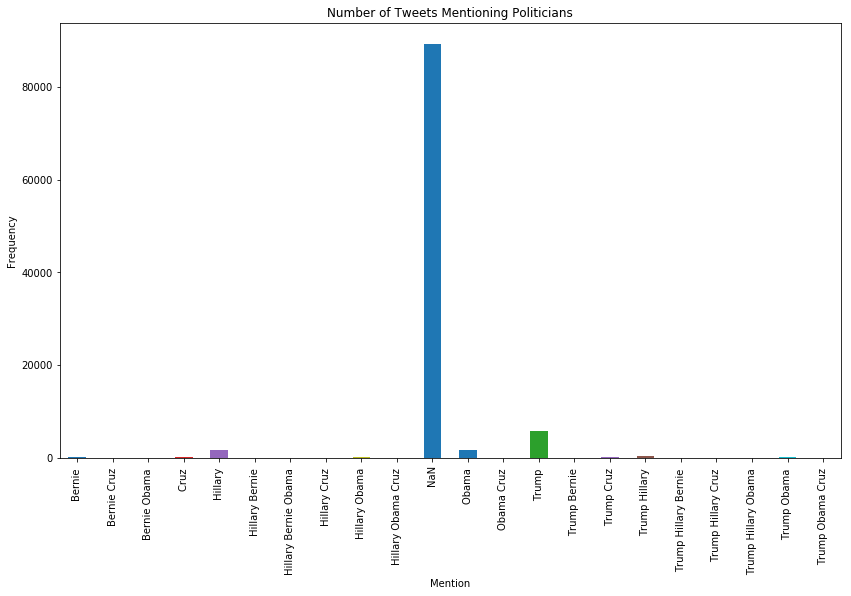

In [6]:
copy_df = pd.DataFrame(df)
copy_df = copy_df[copy_df.mention != '']
%matplotlib inline
ax = copy_df.groupby(by='mention')['mention'].count().plot.bar(title="Number of Tweets Mentioning Politicians", figsize=(14,8))
_ = ax.set_xlabel('Mention')
_ = ax.set_ylabel('Frequency')




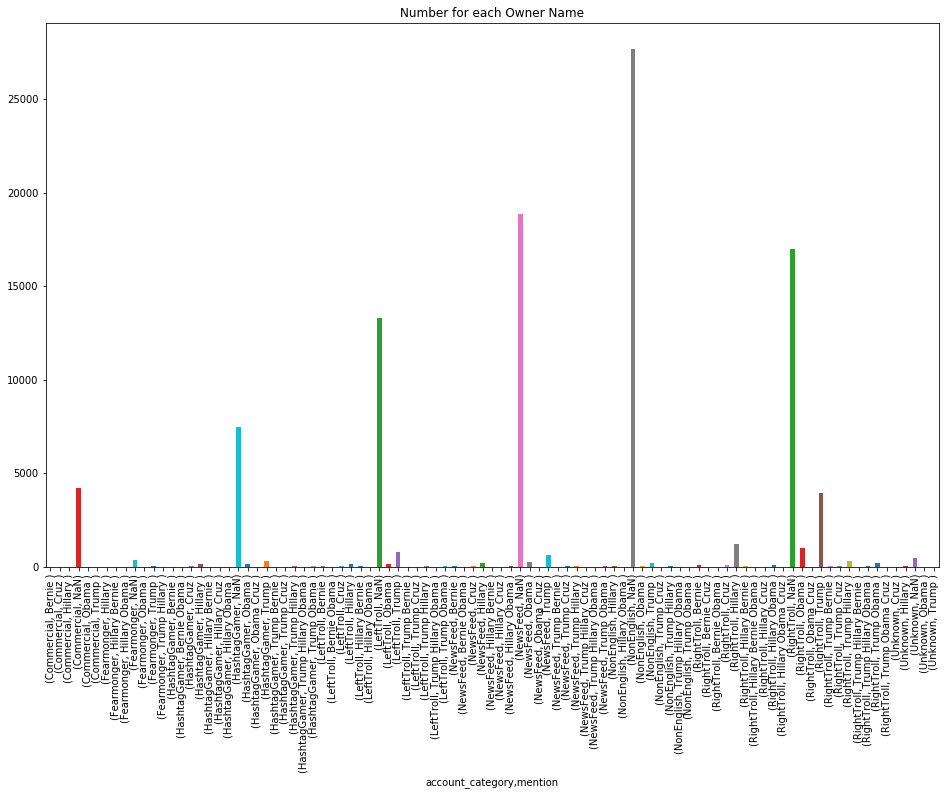

In [7]:
ax = copy_df.groupby(['account_category', 'mention'])['mention'].count().plot.bar(title="Number for each Owner Name", figsize=(16,10))
